# Exploratory Data Analysis Notebook

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_theme(style="ticks")

## Data Loading

In [2]:
pd.set_option('display.max_columns', None) # display all columns
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-14/drugs.csv')
print(f"There are {len(df)} different drugs with {len(df.columns)} different features (columns) in the dataset.")

There are 1988 different drugs with 28 different features (columns) in the dataset.


## Data Formatting

In [3]:
# Format dates
df['marketing_authorisation_date'] = pd.to_datetime(df['marketing_authorisation_date'], format='%Y-%m-%d')
df['date_of_refusal_of_marketing_authorisation'] = pd.to_datetime(df['date_of_refusal_of_marketing_authorisation'], format='%Y-%m-%d')
df['date_of_opinion'] = pd.to_datetime(df['date_of_opinion'], format='%Y-%m-%d')
df['decision_date'] = pd.to_datetime(df['decision_date'], format='%Y-%m-%d')
df['first_published'] = pd.to_datetime(df['first_published'], format='%Y-%m-%dT%H:%M:%SZ')
df['revision_date'] = pd.to_datetime(df['revision_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Format string into list of strings
df['therapeutic_area'] = df['therapeutic_area'].str.split('; ')
df['common_name'] = df['common_name'].str.split(', ')
df['active_substance'] = df['active_substance'].str.split(', ')
df['pharmacotherapeutic_group'] = df['pharmacotherapeutic_group'].str.split(', ')
df['species'] = df['species'].str.split('; ')

# Convert revision_number from float to int
df['revision_number'] = df['revision_number'].astype('Int64')

df.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,generic,biosimilar,conditional_approval,exceptional_circumstances,accelerated_assessment,orphan_medicine,marketing_authorisation_date,date_of_refusal_of_marketing_authorisation,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"[Lymphoma, Non-Hodgkin, Hodgkin Disease]",[brentuximab vedotin],[brentuximab vedotin],2455,False,authorised,L01XC12,False,False,False,False,False,False,True,2012-10-25,NaT,Takeda Pharma A/S,[Antineoplastic agents],2012-07-19,2022-11-17,34,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25 13:58:00,2023-03-13 11:52:00,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,[Tyrosinemias],[nitisinone],[nitisinone],4582,False,authorised,A16AX04,False,True,False,False,False,False,False,2018-07-26,NaT,Cycle Pharmaceuticals (Europe) Ltd,"[Other alimentary tract and metabolism products,]",2018-05-31,2023-03-10,4,Treatment of adult and paediatric patients wit...,NaN,2018-07-26 14:20:00,2023-03-10 17:29:00,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,[Lymphoproliferative Disorders],[tabelecleucel],[tabelecleucel],4577,False,authorised,NaN,True,False,False,False,True,False,True,2022-12-16,NaT,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12 16:13:00,2023-03-10 13:40:00,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,[COVID-19 virus infection],"[casirivimab, imdevimab]","[casirivimab, imdevimab]",5814,False,authorised,J06BD,True,False,False,False,False,False,False,2021-11-12,NaT,Roche Registration GmbH,"[Immune sera and immunoglobulins,]",2021-11-11,2023-02-24,3,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12 16:30:00,2023-03-10 12:29:00,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"[Arthritis, Psoriatic, Psoriasis, Spondyliti...",[secukinumab],[secukinumab],3729,False,authorised,L04AC10,False,False,False,False,False,False,False,2015-01-14,NaT,Novartis Europharm Limited,[Immunosuppressants],2014-11-20,2023-01-26,30,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07 11:59:00,2023-03-09 18:53:00,https://www.ema.europa.eu/en/medicines/human/E...


|variable                                    |class     |description                                 |
|:-------------------------------------------|:---------|:-------------------------------------------|
|category                                    |string |human or veterinary |
|medicine_name                               |string |brand name of the medicine |
|therapeutic_area                            |list of strings |semicolon-separated list of therapeutic areas; might benefit from further cleaning |
|common_name                                 |list of strings |international non-proprietary name (INN) or common name |
|active_substance                            |list of strings |common name of the active chemical in the drug |
|product_number                              |integer |EMEA/H/C/ (human) or EMEA/V/C/ (veterinary) number for the drug |
|patient_safety                              |bool   |has patient safety notices |
|authorisation_status                        |string |whether the drug was authorised, withdrawn, or refused (or does not have a reported status) |
|atc_code                                    |string |anatomical therapeutic chemical code |
|additional_monitoring                       |bool   |when true, the medicine is under additional monitoring, meaning that it is monitored even more intensively than other medicines|
|generic                                     |bool   |whether the drug is a generic medicine, which is developed to be the same as a medicine that has already been authorised, called the reference medicine. A generic medicine contains the same active substance(s) as the reference medicine, and is used at the same dose(s) to treat the same disease(s) |
|biosimilar                                  |bool   |whether the drug is a biosimilar medicine, which is a biological medicine highly similar to another already approved biological medicine called the reference medicine.|
|conditional_approval                        |bool   |whether the medicine received a conditional marketing authorisation. This was granted in the interest of public health because the medicine addresses an unmet medical need and the benefit of immediate availability outweighs the risk from less comprehensive data than normally required. |
|exceptional_circumstances                   |bool   |whether the medicine was authorised under exceptional circumstances, because the applicant was unable to provide comprehensive data on the efficacy and safety of the medicine under normal conditions of use. This can happen because the condition to be treated is rare or because collection of full information is not possible or is unethical. |
|accelerated_assessment                      |bool   |whether the medicine had an accelerated assessment. This means that it is a medicine of major interest for public health, so its timeframe for review was 150 evaluation days rather than 210. |
|orphan_medicine                             |bool   |whether the medicine was designated an orphan medicine. This means that it was developed for use against a rare, life-threatening or chronically debilitating condition or, for economic reasons, it would be unlikely to have been developed without incentives. |
|marketing_authorisation_date                |date      |date on which the drug was authorised |
|date_of_refusal_of_marketing_authorisation  |date      |date on which the drug was refused |
|marketing_authorisation_holder_company_name |string |name of the company that is authorised to market the drug |
|pharmacotherapeutic_group                   |list of strings |the target of the drug; might benefit from further cleaning |
|date_of_opinion                             |date      |date on which the opinion was made |
|decision_date                               |date      |date on which the latest decision was made |
|revision_number                             |integer   |integer revision number |
|condition_indication                        |string |language describing the specific uses of the drug |
|species                                     |string |for veterinary medicines, the target species; might benefit from further cleaning |
|first_published                             |datetime  |datetime when the information was first published |
|revision_date                               |datetime  |datetime of the most recent revision |
|url                                         |string |url for details about the drug and submission |

---

## Categorical Features

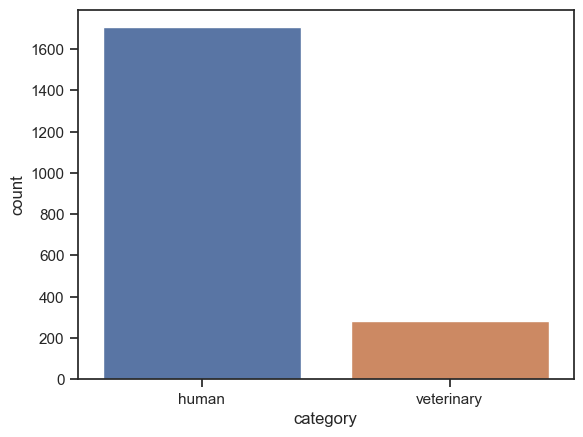

In [4]:
sns.countplot(data=df, x='category')
plt.show()

In [5]:
# The category 'veterinary' is divided into different species
df.explode('species')['species'].str.split('(', n=1).str[0].str.strip().str.split(',', n=1).str[0].str.strip().value_counts()

Dogs                        107
Cats                         61
Pigs                         61
Cattle                       46
Chicken                      28
Horses                       27
Sheep                        23
Rabbits                       5
Calves                        5
Turkeys                       4
Embryonated chicken eggs      4
Ducks                         3
Ferrets                       3
Raccoon dogs                  2
Red foxes                     2
Sows                          2
Embryonated eggs              2
Bees                          2
Guinea pigs                   2
Pheasants                     1
Female pigs                   1
Atlantic salmon               1
Goats                         1
Male pigs                     1
Avian                         1
Honey bees                    1
Salmonidae                    1
Name: species, dtype: int64

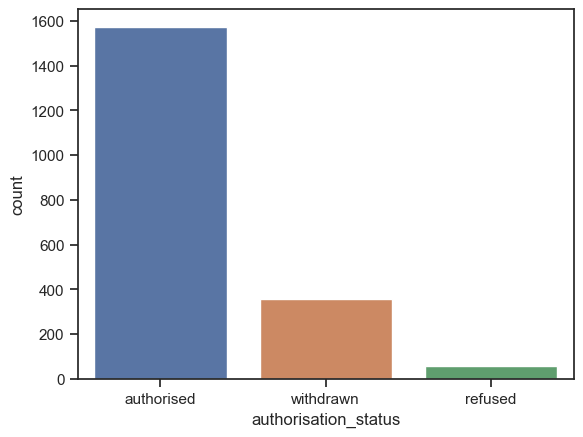

In [6]:
sns.countplot(data=df, x='authorisation_status')
plt.show()

In [7]:
df.explode('active_substance')['active_substance'].value_counts()

metformin hydrochloride    20
meloxicam                  20
hydrochlorothiazide        19
emtricitabine              17
adalimumab                 16
                           ..
polatuzumab vedotin         1
blinatumomab                1
tagraxofusp                 1
midostaurin                 1
dodecafluoropentane         1
Name: active_substance, Length: 1582, dtype: int64

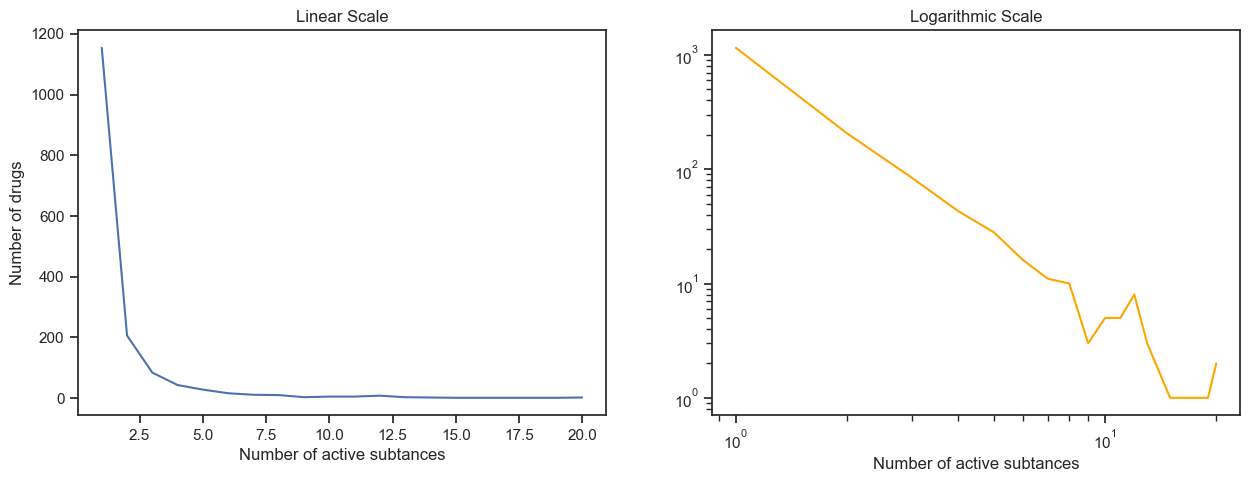

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.explode('active_substance').groupby('active_substance').size().value_counts().sort_index().plot(ax=ax1)
ax1.set_xlabel("Number of active subtances")
ax1.set_ylabel("Number of drugs")
ax1.set_title('Linear Scale')

df.explode('active_substance').groupby('active_substance').size().value_counts().sort_index().plot(ax=ax2, color='orange')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Number of active subtances")
ax2.set_title('Logarithmic Scale')

plt.show()

In [9]:
df.explode('marketing_authorisation_holder_company_name')['marketing_authorisation_holder_company_name'].value_counts()

Novartis Europharm Limited          58
Accord Healthcare S.L.U.            58
Pfizer Europe MA EEIG               43
Zoetis Belgium SA                   40
AstraZeneca AB                      36
                                    ..
EigerBio Europe Limited              1
Passauer Pharma GmbH                 1
Servier (Ireland) Industries Ltd     1
Photonamic GmbH & Co. KG             1
Alimenterics B.V.                    1
Name: marketing_authorisation_holder_company_name, Length: 615, dtype: int64

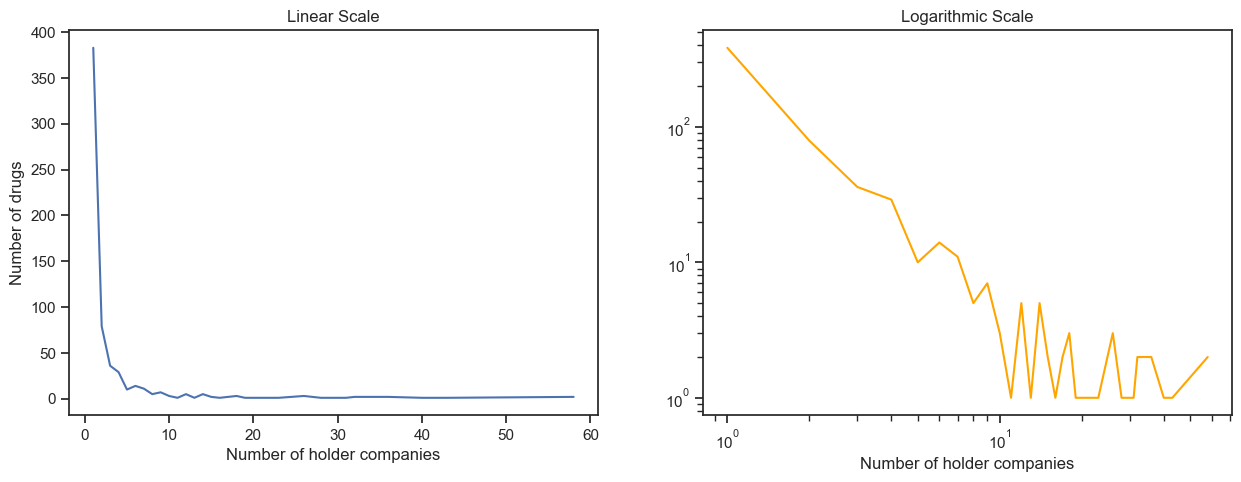

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.groupby('marketing_authorisation_holder_company_name').size().value_counts().sort_index().plot(ax=ax1)
ax1.set_xlabel("Number of holder companies")
ax1.set_ylabel("Number of drugs")
ax1.set_title('Linear Scale')

df.groupby('marketing_authorisation_holder_company_name').size().value_counts().sort_index().plot(ax=ax2, color='orange')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Number of holder companies")
ax2.set_title('Logarithmic Scale')

plt.show()

In [11]:
df.explode('pharmacotherapeutic_group')['pharmacotherapeutic_group'].value_counts()

Antineoplastic agents                                    269
Immunosuppressants                                       112
Drugs used in diabetes                                   111
Antivirals for systemic use                              106
Vaccines,                                                 68
                                                        ... 
Other hormone antagonists and related agents               1
Cough and cold preparations                                1
doxorubicin                                                1
Antihypertensives for pulmonary arterial hypertension      1
fast-acting                                                1
Name: pharmacotherapeutic_group, Length: 340, dtype: int64

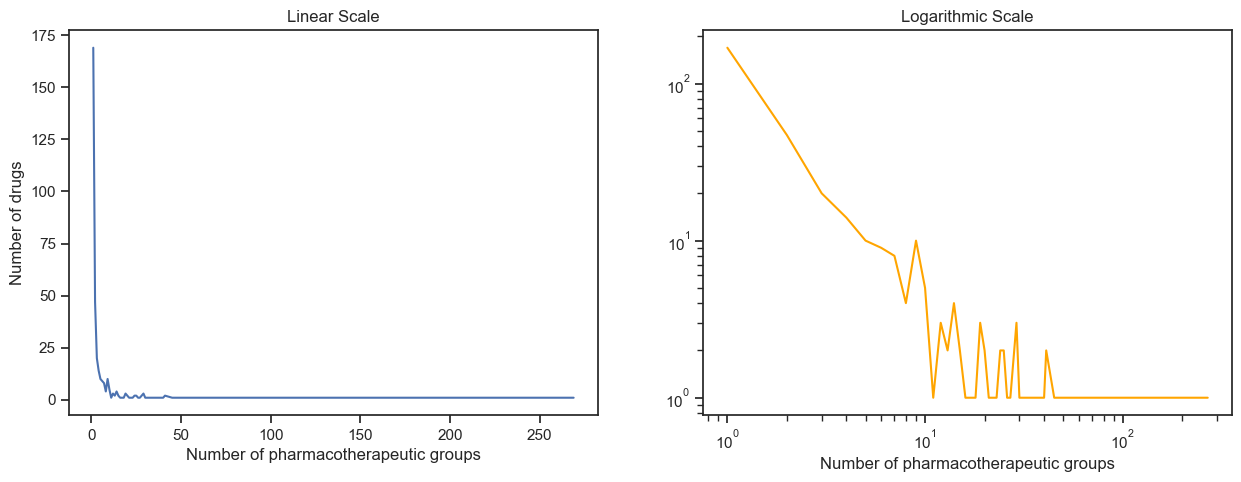

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.explode('pharmacotherapeutic_group').groupby('pharmacotherapeutic_group').size().value_counts().sort_index().plot(ax=ax1)
ax1.set_xlabel("Number of pharmacotherapeutic groups")
ax1.set_ylabel("Number of drugs")
ax1.set_title('Linear Scale')

df.explode('pharmacotherapeutic_group').groupby('pharmacotherapeutic_group').size().value_counts().sort_index().plot(ax=ax2, color='orange')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Number of pharmacotherapeutic groups")
ax2.set_title('Logarithmic Scale')

plt.show()

---

## Boolean features

In [13]:
print(f"Percentages of:")
print(f"- patient_safety: {df['patient_safety'].mean():.2%}")
print(f"- additional_monitoring: {df['additional_monitoring'].mean():.2%}")
print(f"- generic: {df['generic'].mean():.2%}")
print(f"- biosimilar: {df['biosimilar'].mean():.2%}")
print(f"- conditional_approval: {df['conditional_approval'].mean():.2%}")
print(f"- exceptional_circumstances: {df['exceptional_circumstances'].mean():.2%}")
print(f"- accelerated_assessment: {df['accelerated_assessment'].mean():.2%}")
print(f"- orphan_medicine: {df['orphan_medicine'].mean():.2%}")

Percentages of:
- patient_safety: 0.55%
- additional_monitoring: 19.47%
- generic: 15.85%
- biosimilar: 4.63%
- conditional_approval: 2.41%
- exceptional_circumstances: 2.41%
- accelerated_assessment: 2.41%
- orphan_medicine: 8.15%


---

## Time series

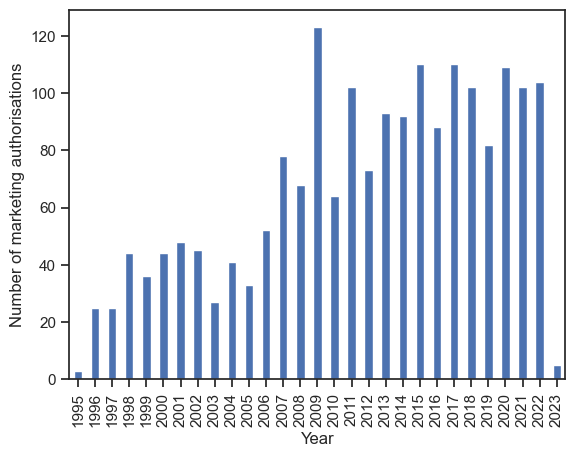

In [14]:
df.marketing_authorisation_date.dt.strftime('%Y').value_counts().sort_index().plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of marketing authorisations")
plt.show()

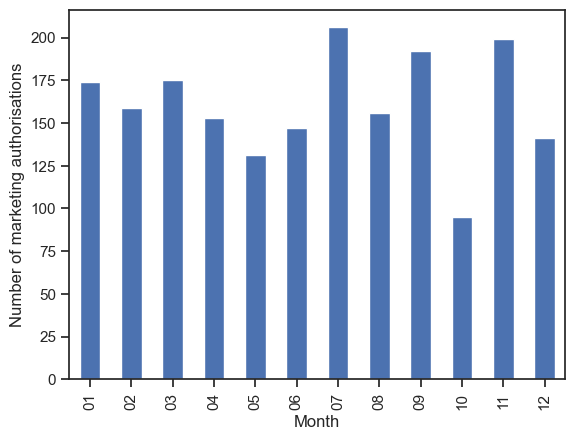

In [15]:
df.marketing_authorisation_date.dt.strftime('%m').value_counts().sort_index().plot.bar()
plt.xlabel("Month")
plt.ylabel("Number of marketing authorisations")
plt.show()

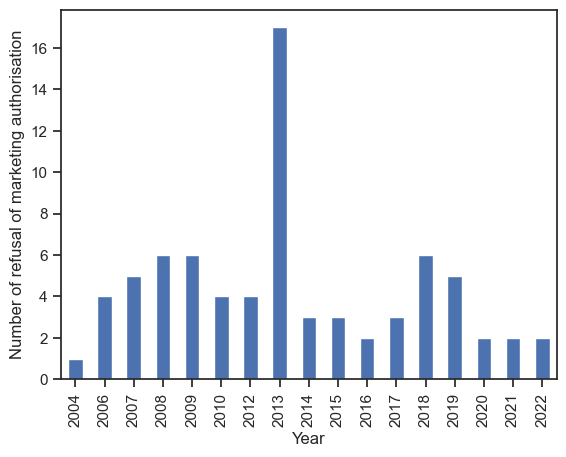

In [16]:
df.date_of_refusal_of_marketing_authorisation.dt.strftime('%Y').value_counts().sort_index().plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of refusal of marketing authorisation")
plt.show()

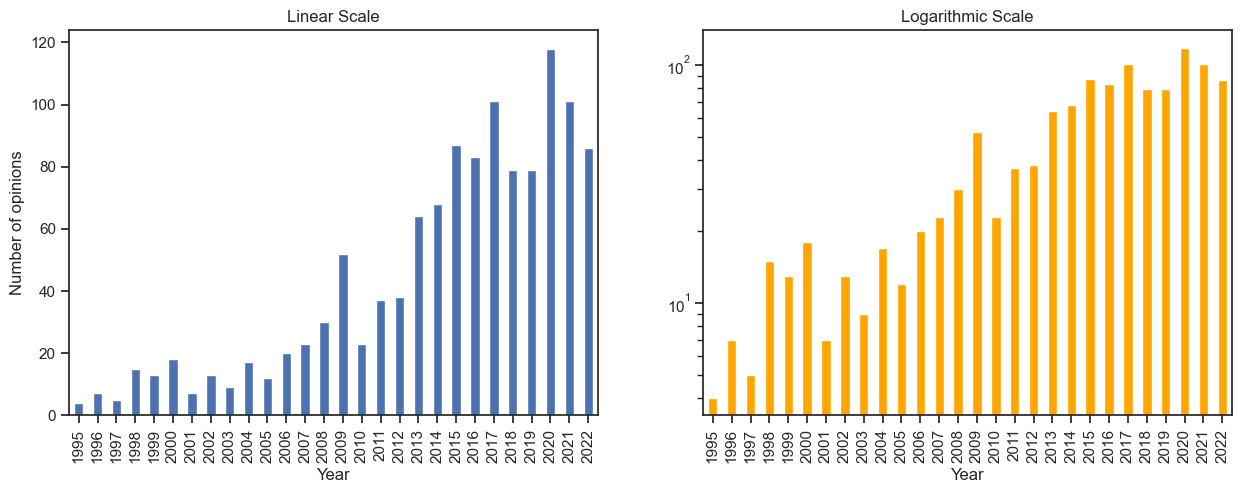

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.date_of_opinion.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of opinions")
ax1.set_title('Linear Scale')

df.date_of_opinion.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax2, color='orange')
ax2.set_yscale('log')
ax2.set_xlabel("Year")
ax2.set_title('Logarithmic Scale')

plt.show()

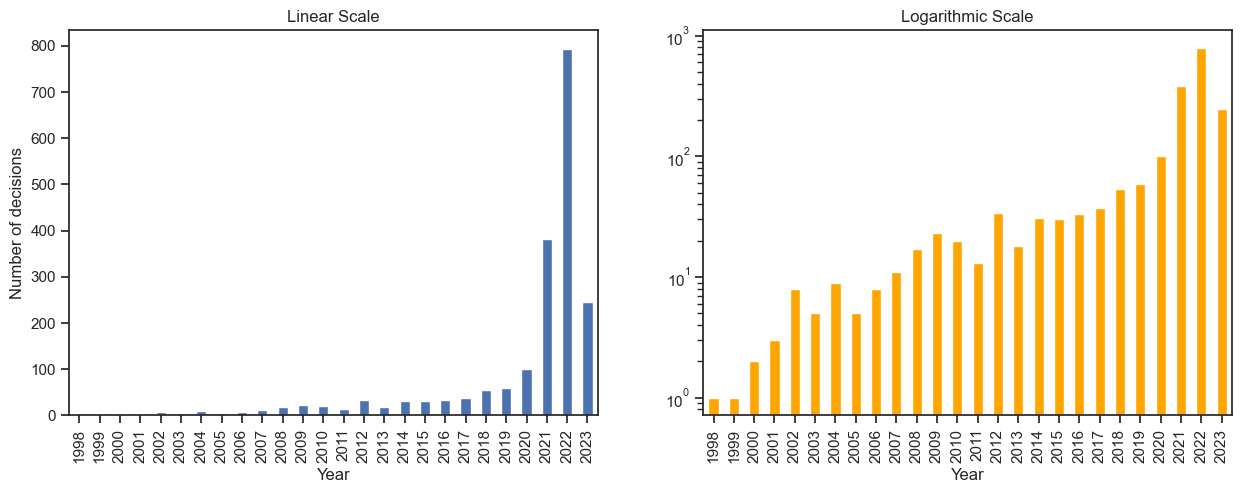

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.decision_date.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of decisions")
ax1.set_title('Linear Scale')

df.decision_date.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax2, color='orange')
ax2.set_yscale('log')
ax2.set_xlabel("Year")
ax2.set_title('Logarithmic Scale')

plt.show()

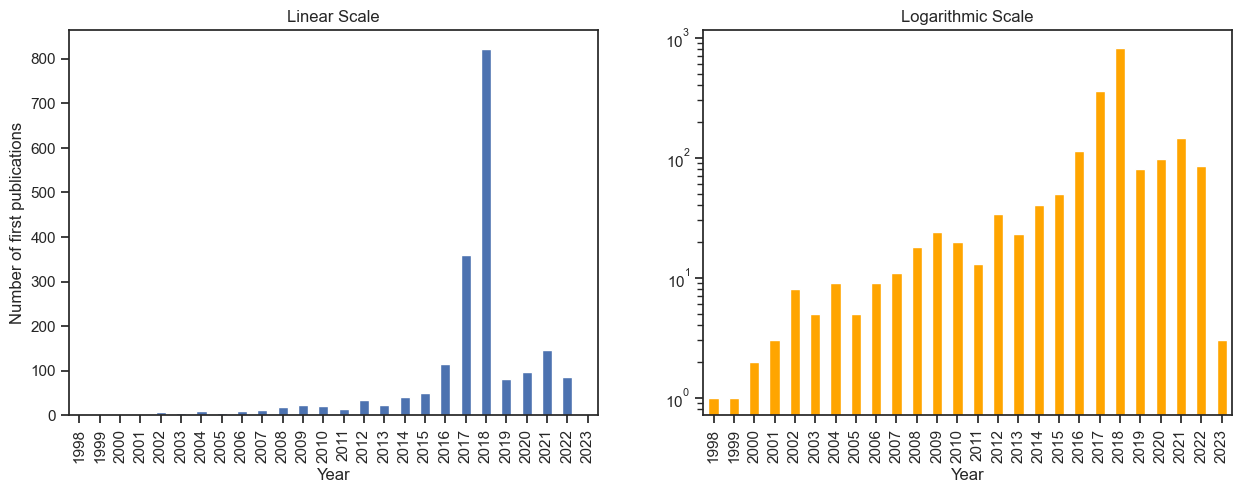

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.first_published.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of first publications")
ax1.set_title('Linear Scale')

df.first_published.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax2, color='orange')
ax2.set_yscale('log')
ax2.set_xlabel("Year")
ax2.set_title('Logarithmic Scale')

plt.show()

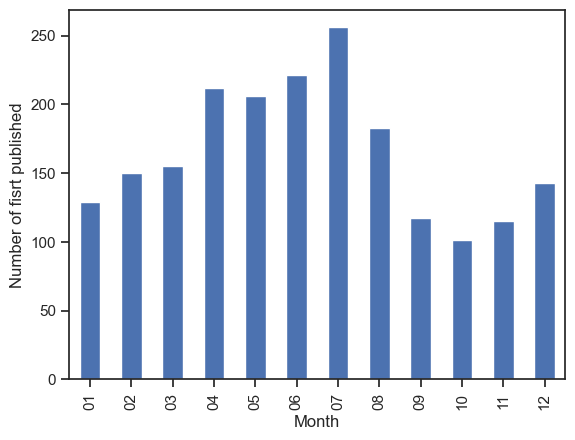

In [20]:
df.first_published.dt.strftime('%m').value_counts().sort_index().plot.bar()
plt.xlabel("Month")
plt.ylabel("Number of fisrt published")
plt.show()

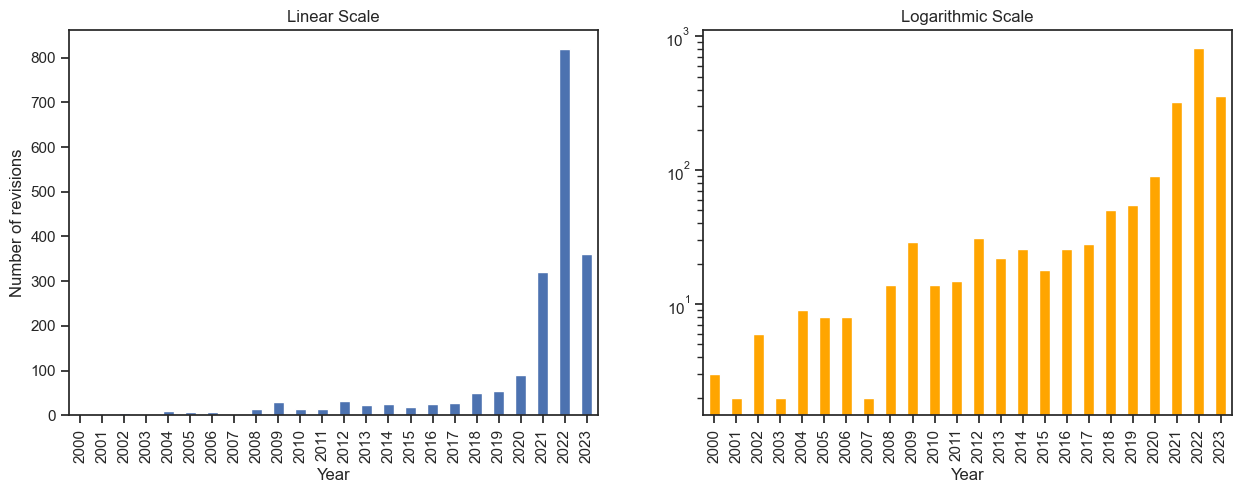

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.revision_date.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of revisions")
ax1.set_title('Linear Scale')

df.revision_date.dt.strftime('%Y').value_counts().sort_index().plot.bar(ax=ax2, color='orange')
ax2.set_yscale('log')
ax2.set_xlabel("Year")
ax2.set_title('Logarithmic Scale')

plt.show()

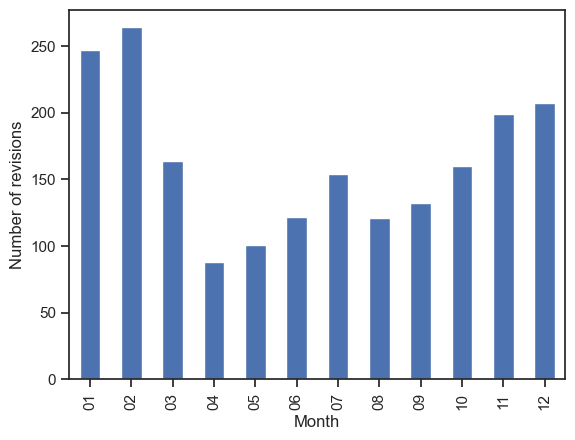

In [22]:
df.revision_date.dt.strftime('%m').value_counts().sort_index().plot.bar()
plt.xlabel("Month")
plt.ylabel("Number of revisions")
plt.show()

In [23]:
top_companies = df['marketing_authorisation_holder_company_name'].value_counts().nlargest(7)
print(top_companies)
top_companies = top_companies.index

Novartis Europharm Limited             58
Accord Healthcare S.L.U.               58
Pfizer Europe MA EEIG                  43
Zoetis Belgium SA                      40
AstraZeneca AB                         36
Boehringer Ingelheim Vetmedica GmbH    36
Merck Sharp & Dohme B.V.               32
Name: marketing_authorisation_holder_company_name, dtype: int64


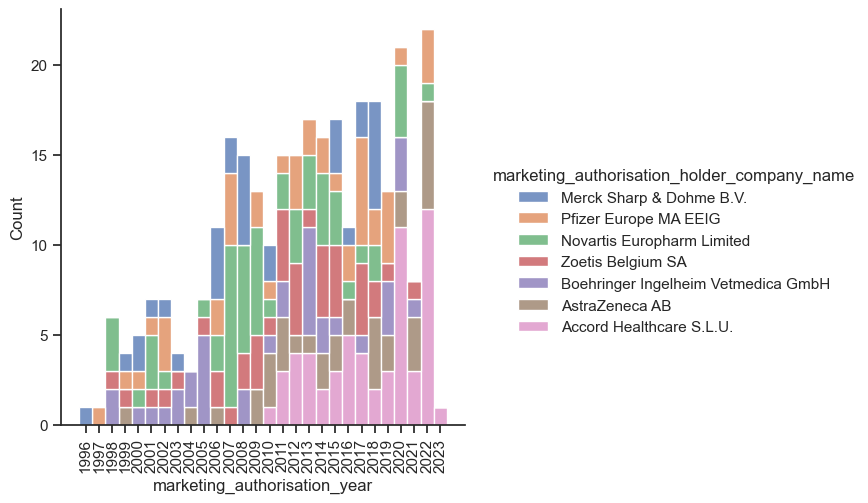

In [24]:
df['marketing_authorisation_year'] = df['marketing_authorisation_date'].dt.strftime('%Y')
sns.displot(data=df[df['marketing_authorisation_holder_company_name'].isin(top_companies)].sort_values(by='marketing_authorisation_year'), x='marketing_authorisation_year', hue='marketing_authorisation_holder_company_name', multiple='stack')
plt.tick_params(axis='x', rotation=90)
plt.show()

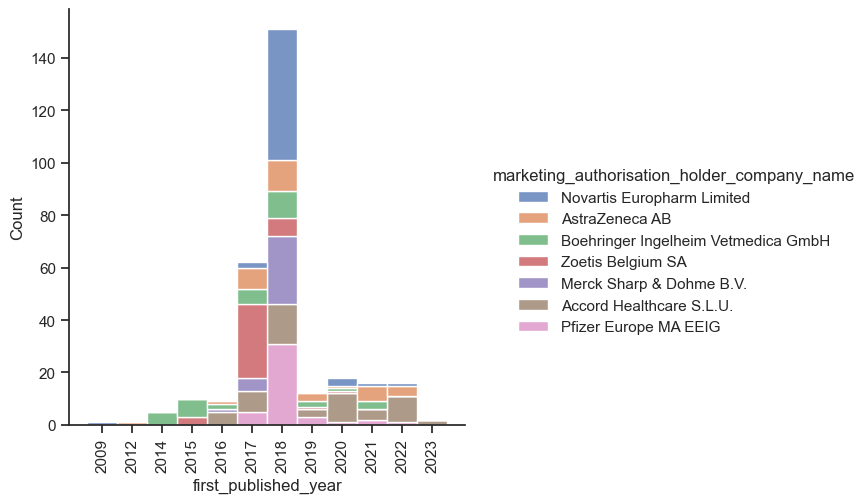

In [25]:
df['first_published_year'] = df['first_published'].dt.strftime('%Y')
sns.displot(data=df[df['marketing_authorisation_holder_company_name'].isin(top_companies)].sort_values(by='first_published_year'), x='first_published_year', hue='marketing_authorisation_holder_company_name', multiple='stack')
plt.tick_params(axis='x', rotation=90)
plt.show()

---

## Numerical Features

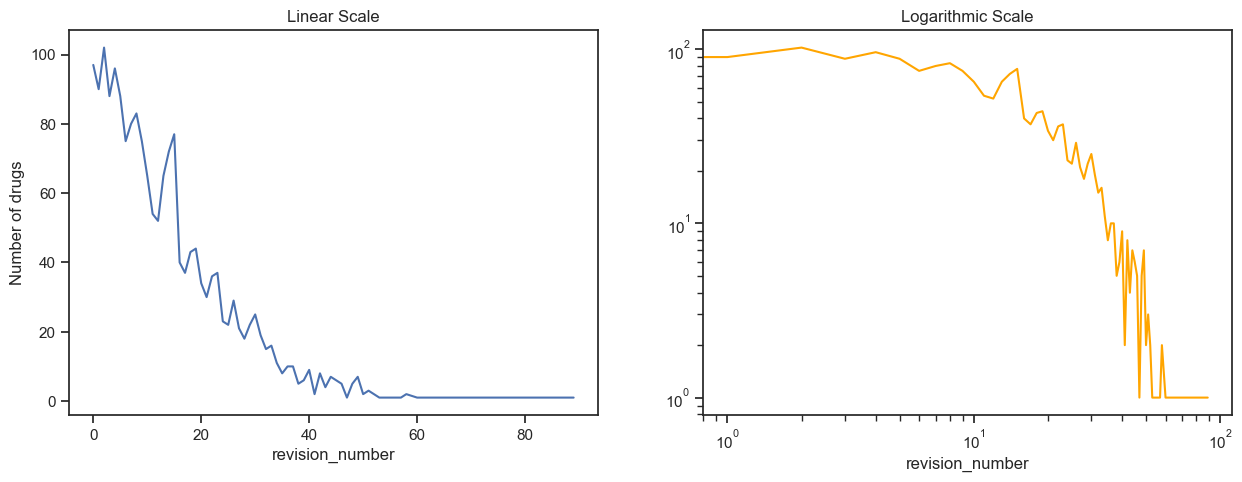

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df.revision_number.value_counts().sort_index().plot(ax=ax1)
ax1.set_xlabel("revision_number")
ax1.set_ylabel("Number of drugs")
ax1.set_title('Linear Scale')

df.revision_number.value_counts().sort_index().plot(ax=ax2, color='orange')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("revision_number")
ax2.set_title('Logarithmic Scale')

plt.show()

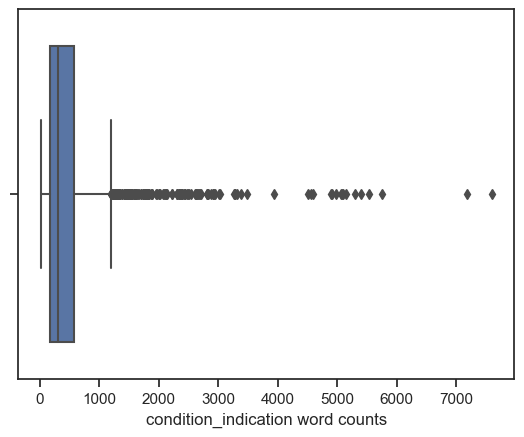

In [27]:
sns.boxplot(x=df['condition_indication'].str.len())
plt.xlabel("condition_indication word counts")
plt.show()